In [2]:
#import dependencies
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import regularizers, optimizers
import numpy as np
from matplotlib import pyplot

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
# download and split the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print("training data = ", x_train.shape)
print("testing data = ", x_test.shape)

training data =  (50000, 32, 32, 3)
testing data =  (10000, 32, 32, 3)


In [5]:
mean = np.mean(x_train)
std = np.std(x_train)
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

In [6]:
num_classes = 10
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)

In [7]:
# build the model

# number of hidden units variable 
# we are declaring this variable here and use it in our CONV layers to make it easier to update from one place
base_hidden_units = 32

# l2 regularization hyperparameter
weight_decay = 1e-4 

def sample_model():
  # instantiate an empty sequential model 
  model = Sequential()

  # CONV1
  # notice that we defined the input_shape here because this is the first CONV layer. 
  # we don’t need to do that for the remaining layers
  model.add(Conv2D(base_hidden_units, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  # CONV2
  model.add(Conv2D(base_hidden_units, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))

  # CONV3
  model.add(Conv2D(2*base_hidden_units, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  # CONV4
  model.add(Conv2D(2*base_hidden_units, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.3))

  # FC7
  model.add(Flatten())
  model.add(Dense(num_classes, activation='softmax'))

  return model

model = sample_model()
# print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                        

In [8]:
# data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
    )

# compute the data augmentation on the training set
datagen.fit(x_train)

In [9]:
# self.model.optimizer.learning_rate
from tensorflow import keras
class print_lr(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    
    print(f'Epoch {epoch}, the optimizer state is {self.model.optimizer.get_config()}')

In [10]:
def custom_model():
  # instantiate an empty sequential model 
  model = Sequential()

  # CONV1
  # notice that we defined the input_shape here because this is the first CONV layer. 
  # we don’t need to do that for the remaining layers
  model.add(Conv2D(base_hidden_units, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  # CONV2
  model.add(Conv2D(base_hidden_units, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))

  # CONV3
  model.add(Conv2D(2*base_hidden_units, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  # CONV4
  model.add(Conv2D(2*base_hidden_units, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.3))

  # # CONV5
  model.add(Conv2D(4*base_hidden_units, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  # # CONV6
  model.add(Conv2D(4*base_hidden_units, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.4))

  # FC7
  model.add(Flatten())
  model.add(Dense(num_classes, activation='softmax'))

  return model

new_model = custom_model()
# print model summary
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_4 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_5 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                      

In [12]:
# TODO Please load the old model's layer weight of CONV1 to CONV4 into new model's CONV1 to CONV4
from tensorflow.keras.models import Model
old_model = tf.keras.models.load_model('Prob3_epoch_100.h5')
#old_model.summary()

from tensorflow.keras.callbacks import ModelCheckpoint   
checkpointer = ModelCheckpoint(filepath='Prob3_epoch_100.hdf5', verbose=1, save_best_only=True)

print(len(new_model.layers))


last_layer = old_model.get_layer('dropout_22')
last_output = last_layer.output

x = Conv2D(4*base_hidden_units,(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay))(last_output)
x = BatchNormalization()(x)

x = Conv2D(4*base_hidden_units,(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay))(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(0.4)(x)

x = Flatten()(x)
x = Dense(num_classes, activation='softmax')(x)

# instantiate a new_model using keras’s Model class
new_model = Model(inputs=old_model.input, outputs=x)

# print the new_model summary
new_model.summary()


for i in range(0,16):
    new_model.layers[i].trainable = False
new_model.summary()

25
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42_input (InputLayer  [(None, 32, 32, 3)]      0         
 )                                                               
                                                                 
 conv2d_42 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_42 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_42 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_43 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_43 (Activation)  (None, 32, 32, 32)        0

##

In [15]:
# TODO Train the model with following config and draw the curve
# compile the model
# optimizer = Adam ( learning_rate = 0.0005, decay = 1e-6)
# accuracy metrics = accuracy
# loss = categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005,decay=1e-6)
new_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
batch_size = 128
epochs = 100
history = new_model.fit(datagen.flow(x_train, y_train, batch_size=batch_size), 
                    steps_per_epoch=x_train.shape[0] // batch_size, 
                    epochs=epochs, 
                    verbose=1, 
                    validation_data=(x_test,y_test))

Epoch 1/100
390/390 [==============================] - 18s 34ms/step - loss: 1.3554 - accuracy: 0.6246 - val_loss: 0.8156 - val_accuracy: 0.7642
Epoch 2/100
390/390 [==============================] - 13s 32ms/step - loss: 0.9041 - accuracy: 0.7249 - val_loss: 0.7037 - val_accuracy: 0.7897
Epoch 3/100
390/390 [==============================] - 13s 33ms/step - loss: 0.7843 - accuracy: 0.7558 - val_loss: 0.6515 - val_accuracy: 0.8030
Epoch 4/100
390/390 [==============================] - 13s 32ms/step - loss: 0.7172 - accuracy: 0.7754 - val_loss: 0.5964 - val_accuracy: 0.8174
Epoch 5/100
390/390 [==============================] - 13s 33ms/step - loss: 0.6761 - accuracy: 0.7872 - val_loss: 0.6154 - val_accuracy: 0.8189
Epoch 6/100
390/390 [==============================] - 13s 32ms/step - loss: 0.6445 - accuracy: 0.7981 - val_loss: 0.5648 - val_accuracy: 0.8294
Epoch 7/100
390/390 [==============================] - 13s 32ms/step - loss: 0.6116 - accuracy: 0.8103 - val_loss: 0.5745 - val_ac

390/390 [==============================] - 12s 31ms/step - loss: 0.4301 - accuracy: 0.8796 - val_loss: 0.4917 - val_accuracy: 0.8739
Epoch 58/100
390/390 [==============================] - 12s 31ms/step - loss: 0.4314 - accuracy: 0.8806 - val_loss: 0.5117 - val_accuracy: 0.8689
Epoch 59/100
390/390 [==============================] - 12s 32ms/step - loss: 0.4284 - accuracy: 0.8806 - val_loss: 0.4752 - val_accuracy: 0.8757
Epoch 60/100
390/390 [==============================] - 12s 31ms/step - loss: 0.4283 - accuracy: 0.8828 - val_loss: 0.5004 - val_accuracy: 0.8711
Epoch 61/100
390/390 [==============================] - 12s 31ms/step - loss: 0.4264 - accuracy: 0.8795 - val_loss: 0.4840 - val_accuracy: 0.8770
Epoch 62/100
390/390 [==============================] - 12s 32ms/step - loss: 0.4287 - accuracy: 0.8822 - val_loss: 0.4942 - val_accuracy: 0.8736
Epoch 63/100
390/390 [==============================] - 12s 31ms/step - loss: 0.4262 - accuracy: 0.8836 - val_loss: 0.5121 - val_accuracy

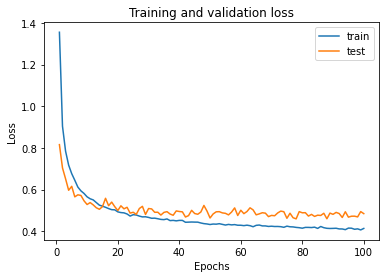

In [24]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)

#plot loss curve
plt.plot(epochs, loss, label='train')
plt.plot(epochs, val_loss, label='test')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('problem3_loss.png')
plt.show()

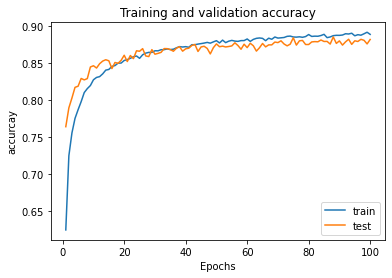

In [25]:
#plot acc curve
plt.plot(epochs, acc, label='train')
plt.plot(epochs, val_acc, label='test')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accurcay')
plt.legend()
plt.savefig('problem3_acc.png')
plt.show()